<a href="https://www.kaggle.com/code/mehmetakifciftci/eda-of-vgsales?scriptVersionId=109838383" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vgsales/vgsales.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import *

In [3]:
df = pd.read_csv('../input/vgsales/vgsales.csv')

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.shape

(16598, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,16598.0,8300.605254,4791.853933,1.00,4151.25,8300.50,12449.75,16600.00
Year,16327.0,2006.406443,5.828981,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16598.0,0.264667,0.816683,0.00,0.00,0.08,0.24,41.49
EU_Sales,16598.0,0.146652,0.505351,0.00,0.00,0.02,0.11,29.02
JP_Sales,16598.0,0.077782,0.309291,0.00,0.00,0.00,0.04,10.22
Other_Sales,16598.0,0.048063,0.188588,0.00,0.00,0.01,0.04,10.57
Global_Sales,16598.0,0.537441,1.555028,0.01,0.06,0.17,0.47,82.74


In [8]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df.keys()

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [10]:
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

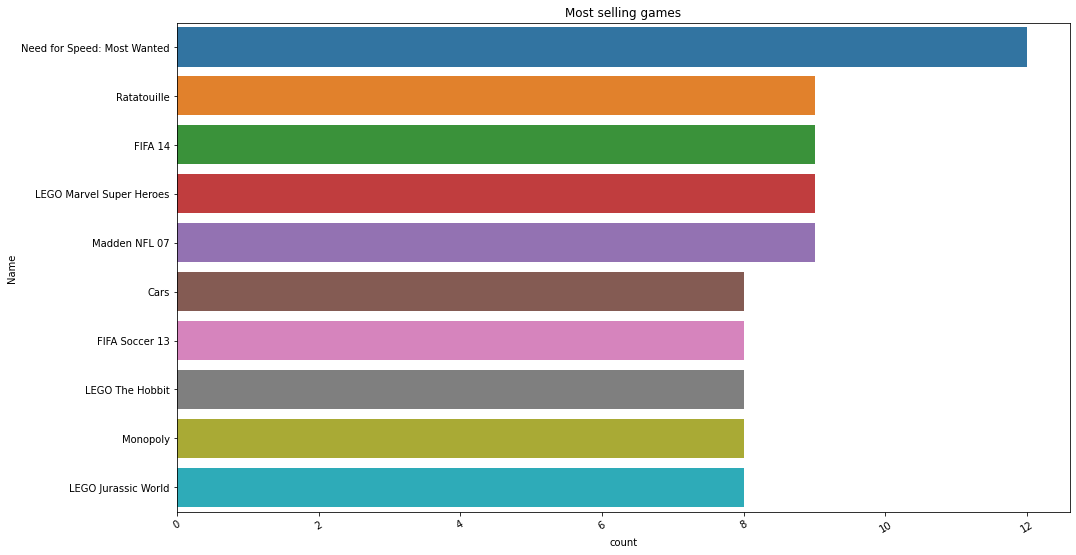

In [11]:
plt.figure(figsize=(16, 9))
plt.title('Most selling games')
sns.countplot(y='Name', data=df, order=df['Name'].value_counts().iloc[:10].index)
plt.xticks(rotation=30)
plt.show()

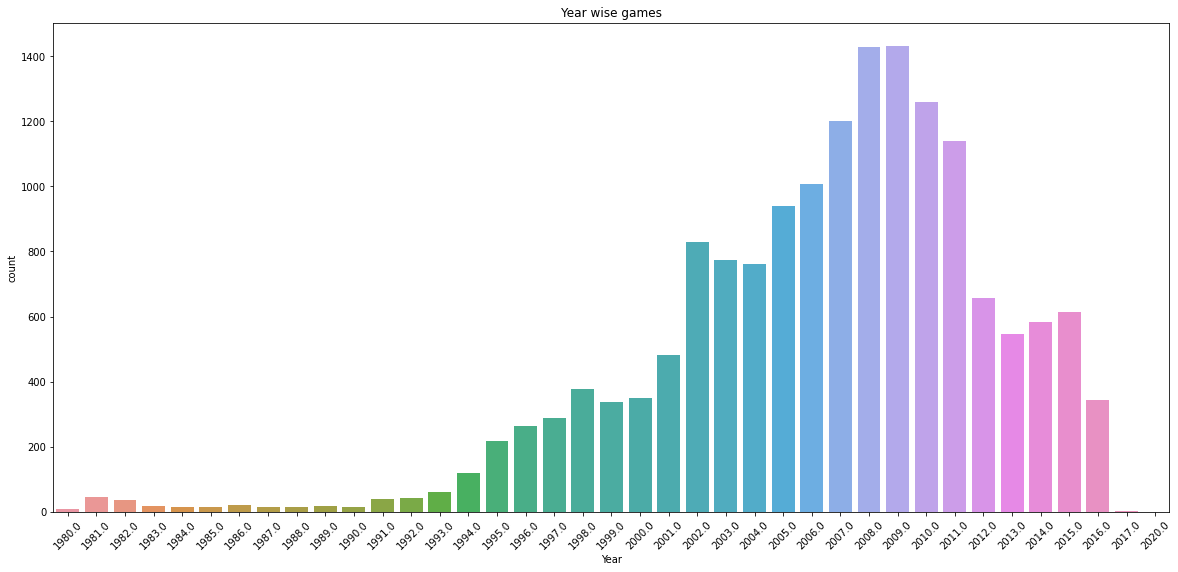

In [12]:
plt.figure(figsize=(20, 9))
sns.countplot(data=df, x="Year")
plt.title("Year wise games")
plt.xticks(rotation=45)
plt.show()

In [13]:
# Null value handling by filling with mean value
df['Year'] = df['Year'].fillna(df['Year'].mean())
print("Finding Null value in data:\n", df.isnull().sum())

Finding Null value in data:
 Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64


In [14]:
#Dropping null values
df.dropna(how='any', inplace=True)
df.isna().sum()
print("Finding Null value in data:\n", df.isnull().sum())

Finding Null value in data:
 Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [15]:
# Converting column Year from float to int type
df['Year'] = df['Year'].astype(int)
print("The info of data:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16540 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16540 non-null  int64  
 1   Name          16540 non-null  object 
 2   Platform      16540 non-null  object 
 3   Year          16540 non-null  int64  
 4   Genre         16540 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16540 non-null  float64
 7   EU_Sales      16540 non-null  float64
 8   JP_Sales      16540 non-null  float64
 9   Other_Sales   16540 non-null  float64
 10  Global_Sales  16540 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB
The info of data:
 None


In [16]:
# Checking numerical columns statistics
print("Describing the data:\n", df.describe().T)
print("Duplicate Shape", df[df.duplicated()].shape)
print("Year shape", df[df["Year"] > 216].shape)

# Correct the year release of these game
df.loc[5957, 'Year'] = 2009
df.loc[14390, 'Year'] = 2012
df.loc[16241, 'Year'] = 2012
df.loc[16438, 'Year'] = 2016
df.loc[18371, 'Year'] = 2012

Describing the data:
                 count         mean          std      min      25%      50%  \
Rank          16540.0  8294.197642  4790.703200     1.00  4143.75  8292.50   
Year          16540.0  2006.399456     5.788552  1980.00  2003.00  2007.00   
NA_Sales      16540.0     0.265079     0.817929     0.00     0.00     0.08   
EU_Sales      16540.0     0.146883     0.506129     0.00     0.00     0.02   
JP_Sales      16540.0     0.077998     0.309800     0.00     0.00     0.00   
Other_Sales   16540.0     0.048191     0.188879     0.00     0.00     0.01   
Global_Sales  16540.0     0.538426     1.557424     0.01     0.06     0.17   

                   75%       max  
Rank          12440.25  16600.00  
Year           2010.00   2020.00  
NA_Sales          0.24     41.49  
EU_Sales          0.11     29.02  
JP_Sales          0.04     10.22  
Other_Sales       0.04     10.57  
Global_Sales      0.48     82.74  
Duplicate Shape (0, 11)
Year shape (16540, 11)


In [17]:
# Checking numerical columns statistics
df.loc[df['Year'] > 2016, 'Year'] = 2016
print("Year shape", df[df["Year"] > 216].shape)

Year shape (16541, 11)


In [18]:
# Total sales by country
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
print("Describing the data:\n", df.describe().T)

total_sales = pd.DataFrame({'Country': ['NA', 'EU', 'JP', 'Other'], 'Sales': [sum(df['NA_Sales']), 
                                                                              sum(df['EU_Sales']),
                                                                              sum(df['JP_Sales']),
                                                                              sum(df['Other_Sales'])]},
                                                                    index=['NA', 'EU', 'JP', 'Other'])


Describing the data:
                 count         mean          std      min      25%      50%  \
Rank          16540.0  8294.197642  4790.703200     1.00  4143.75  8292.50   
Year          16541.0  2006.398464     5.786658  1980.00  2003.00  2007.00   
NA_Sales      16540.0     0.265079     0.817929     0.00     0.00     0.08   
EU_Sales      16540.0     0.146883     0.506129     0.00     0.00     0.02   
JP_Sales      16540.0     0.077998     0.309800     0.00     0.00     0.00   
Other_Sales   16540.0     0.048191     0.188879     0.00     0.00     0.01   
Global_Sales  16540.0     0.538426     1.557424     0.01     0.06     0.17   
Total_Sales   16540.0     0.538152     1.557546     0.00     0.06     0.17   

                   75%       max  
Rank          12440.25  16600.00  
Year           2010.00   2016.00  
NA_Sales          0.24     41.49  
EU_Sales          0.11     29.02  
JP_Sales          0.04     10.22  
Other_Sales       0.04     10.57  
Global_Sales      0.48     82.

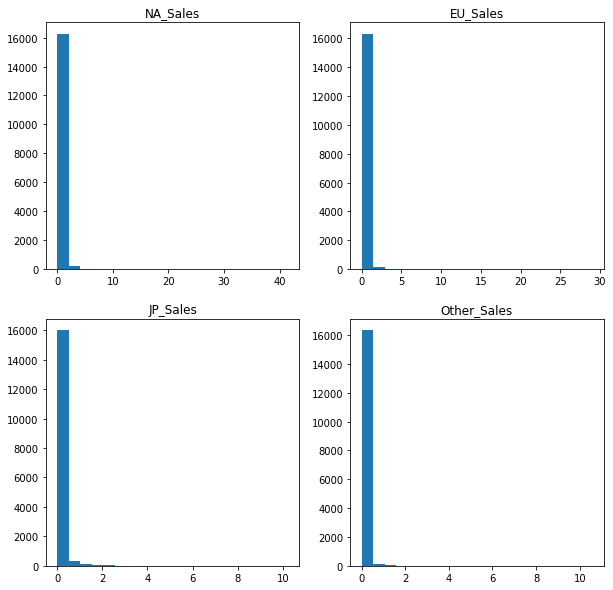

In [19]:
# Droping the columns
fig = plt.figure(facecolor='white', figsize=(10, 10))
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

axes1.hist(df['NA_Sales'], bins=20)
axes1.set_title('NA_Sales')
axes2.hist(df['EU_Sales'], bins=20)
axes2.set_title('EU_Sales')
axes3.hist(df['JP_Sales'], bins=20)
axes3.set_title('JP_Sales')
axes4.hist(df['Other_Sales'], bins=20)
axes4.set_title('Other_Sales')
plt.show()

In [20]:
axes1.hist(df['Total_Sales'], bins=20)
axes1.set_title('Total_Sales')
plt.show()

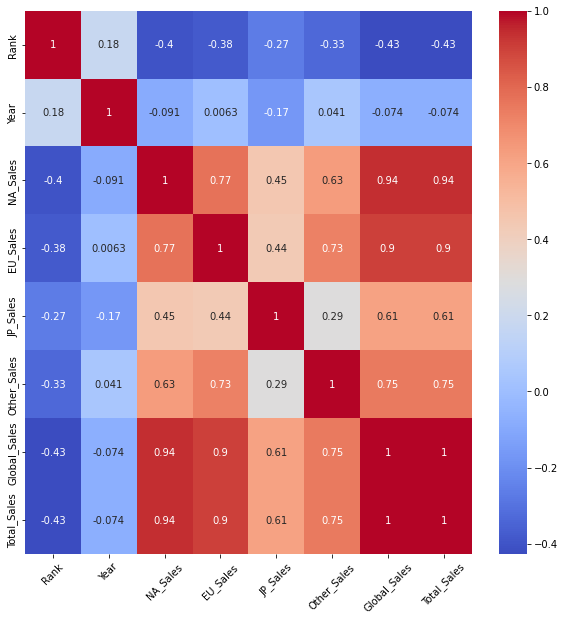

In [21]:
# Correlation between columns
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

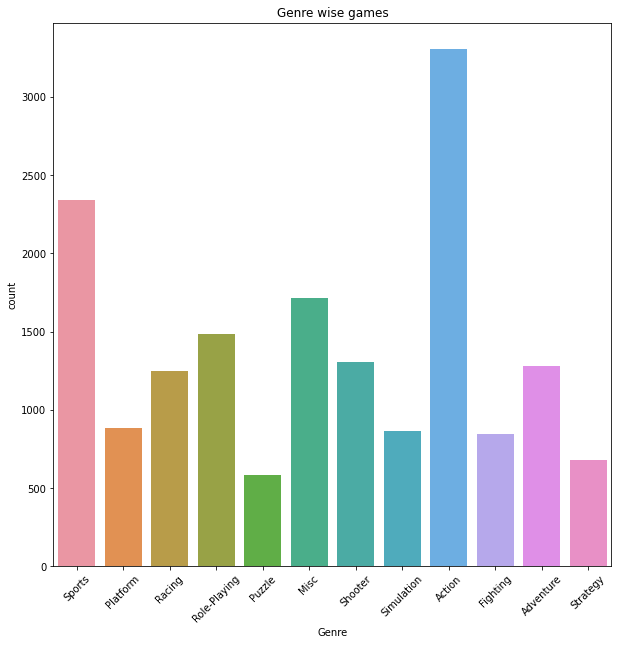

In [22]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x="Genre")
plt.title("Genre wise games")
plt.xticks(rotation=45)
plt.show()

In [23]:
# Top 10 games by total sales
top_10_games = df.groupby('Name')['Total_Sales'].sum().sort_values(ascending=False).head(10)
print(top_10_games)

Name
Wii Sports                        82.74
Grand Theft Auto V                55.92
Super Mario Bros.                 45.31
Tetris                            35.84
Mario Kart Wii                    35.83
Wii Sports Resort                 33.00
Pokemon Red/Pokemon Blue          31.38
Call of Duty: Black Ops           31.04
Call of Duty: Modern Warfare 3    30.84
New Super Mario Bros.             30.01
Name: Total_Sales, dtype: float64


In [24]:
#df['Global_Sales'].describe()
df['Global_Sales'].describe()

count    16540.000000
mean         0.538426
std          1.557424
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

In [25]:
# sales by year
sales_by_year = df.groupby('Year')['Total_Sales'].sum().sort_values(ascending=False)
print(sales_by_year)

Year
2008.0    678.49
2009.0    667.39
2006.0    614.03
2007.0    609.23
2010.0    600.20
2011.0    515.74
2005.0    457.97
2004.0    413.61
2002.0    394.97
2013.0    367.98
2012.0    363.29
2003.0    357.61
2014.0    337.08
2001.0    331.49
2015.0    264.26
1998.0    256.33
1999.0    251.12
2000.0    201.63
1997.0    201.07
1996.0    199.15
1995.0     88.11
1994.0     79.22
1992.0     76.14
1989.0     73.45
2016.0     70.85
1985.0     53.95
1984.0     50.35
1990.0     49.37
1988.0     47.21
1993.0     45.99
1986.0     37.08
1981.0     35.68
1991.0     32.23
1982.0     28.88
1987.0     21.70
1983.0     16.80
1980.0     11.38
Name: Total_Sales, dtype: float64


In [26]:
global_sales_by_year = df.groupby('Year').sum()['Global_Sales']
global_sales_by_year = global_sales_by_year.reset_index()
global_sales_by_year = global_sales_by_year.sort_values(by='Global_Sales', ascending=False)

games_release = df.groupby('Year').count()['Name']

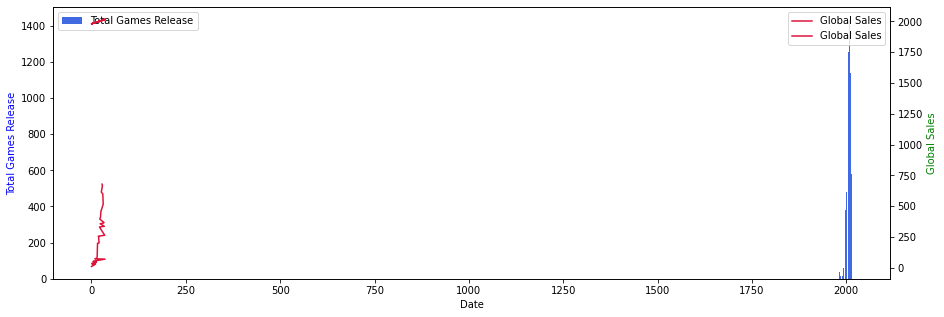

In [27]:
### Data visualization
fig, ax1 = plt.subplots(figsize=(15, 5))
ax2 = ax1.twinx()
ax1.bar(games_release.index, height=games_release, color='royalblue', label="Total Games Release")
ax2.plot(global_sales_by_year.index, global_sales_by_year, color='crimson', label='Global Sales')
ax2.legend(loc=1)
ax1.legend(loc=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Games Release', color='b')
ax2.set_ylabel('Global Sales', color='g')
plt.show()

In [28]:
# SALES AND NUMBERS OF GAMES RELEASED BY PLATFORM
Publisher = df.groupby('Publisher').sum()['Global_Sales']
Publisher = Publisher.reset_index()
Publisher = Publisher.sort_values(by='Global_Sales', ascending=False)
Publisher = Publisher.head(10)
print(Publisher)

                        Publisher  Global_Sales
359                      Nintendo       1786.56
138               Electronic Arts       1110.32
21                     Activision        727.46
456   Sony Computer Entertainment        607.50
525                       Ubisoft        474.72
494          Take-Two Interactive        399.54
488                           THQ        340.77
275  Konami Digital Entertainment        283.64
446                          Sega        272.99
347            Namco Bandai Games        254.09


In [29]:
# SALES BY GENRE
Genre = df.groupby('Genre').sum()['Global_Sales']
Genre = Genre.reset_index()
Genre = Genre.sort_values(by='Global_Sales', ascending=False)
Genre = Genre.head(10)
print(Genre)

           Genre  Global_Sales
0         Action       1750.33
10        Sports       1329.35
8        Shooter       1037.32
7   Role-Playing        927.31
4       Platform        830.87
3           Misc        802.15
6         Racing        732.03
2       Fighting        445.70
9     Simulation        391.96
5         Puzzle        244.94


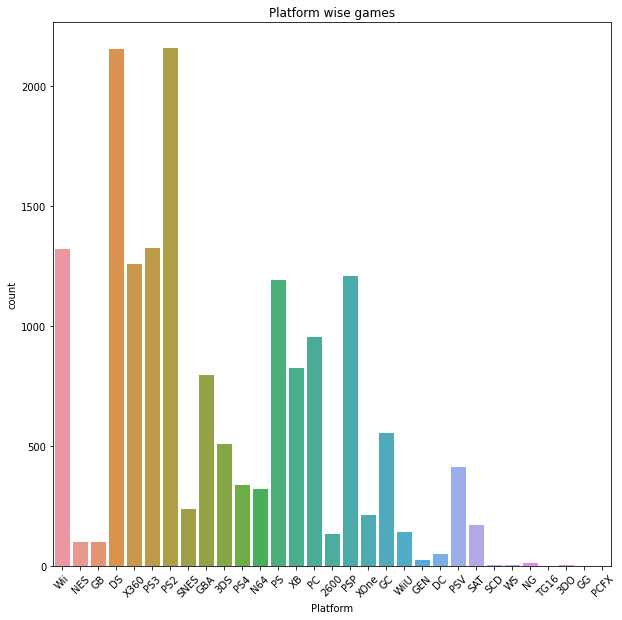

In [30]:
# STATISTICS
plt.figure(figsize=(10, 10))
sns.countplot(data=df, x="Platform")
plt.title("Platform wise games")
plt.xticks(rotation=45)
plt.show()


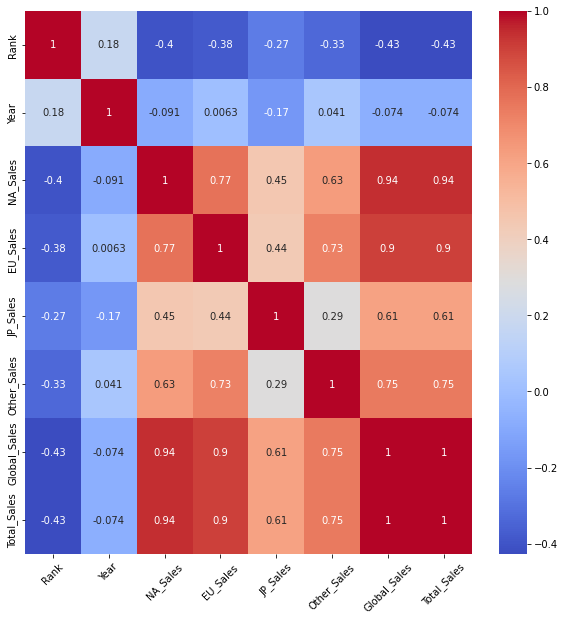

In [31]:

# Start
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

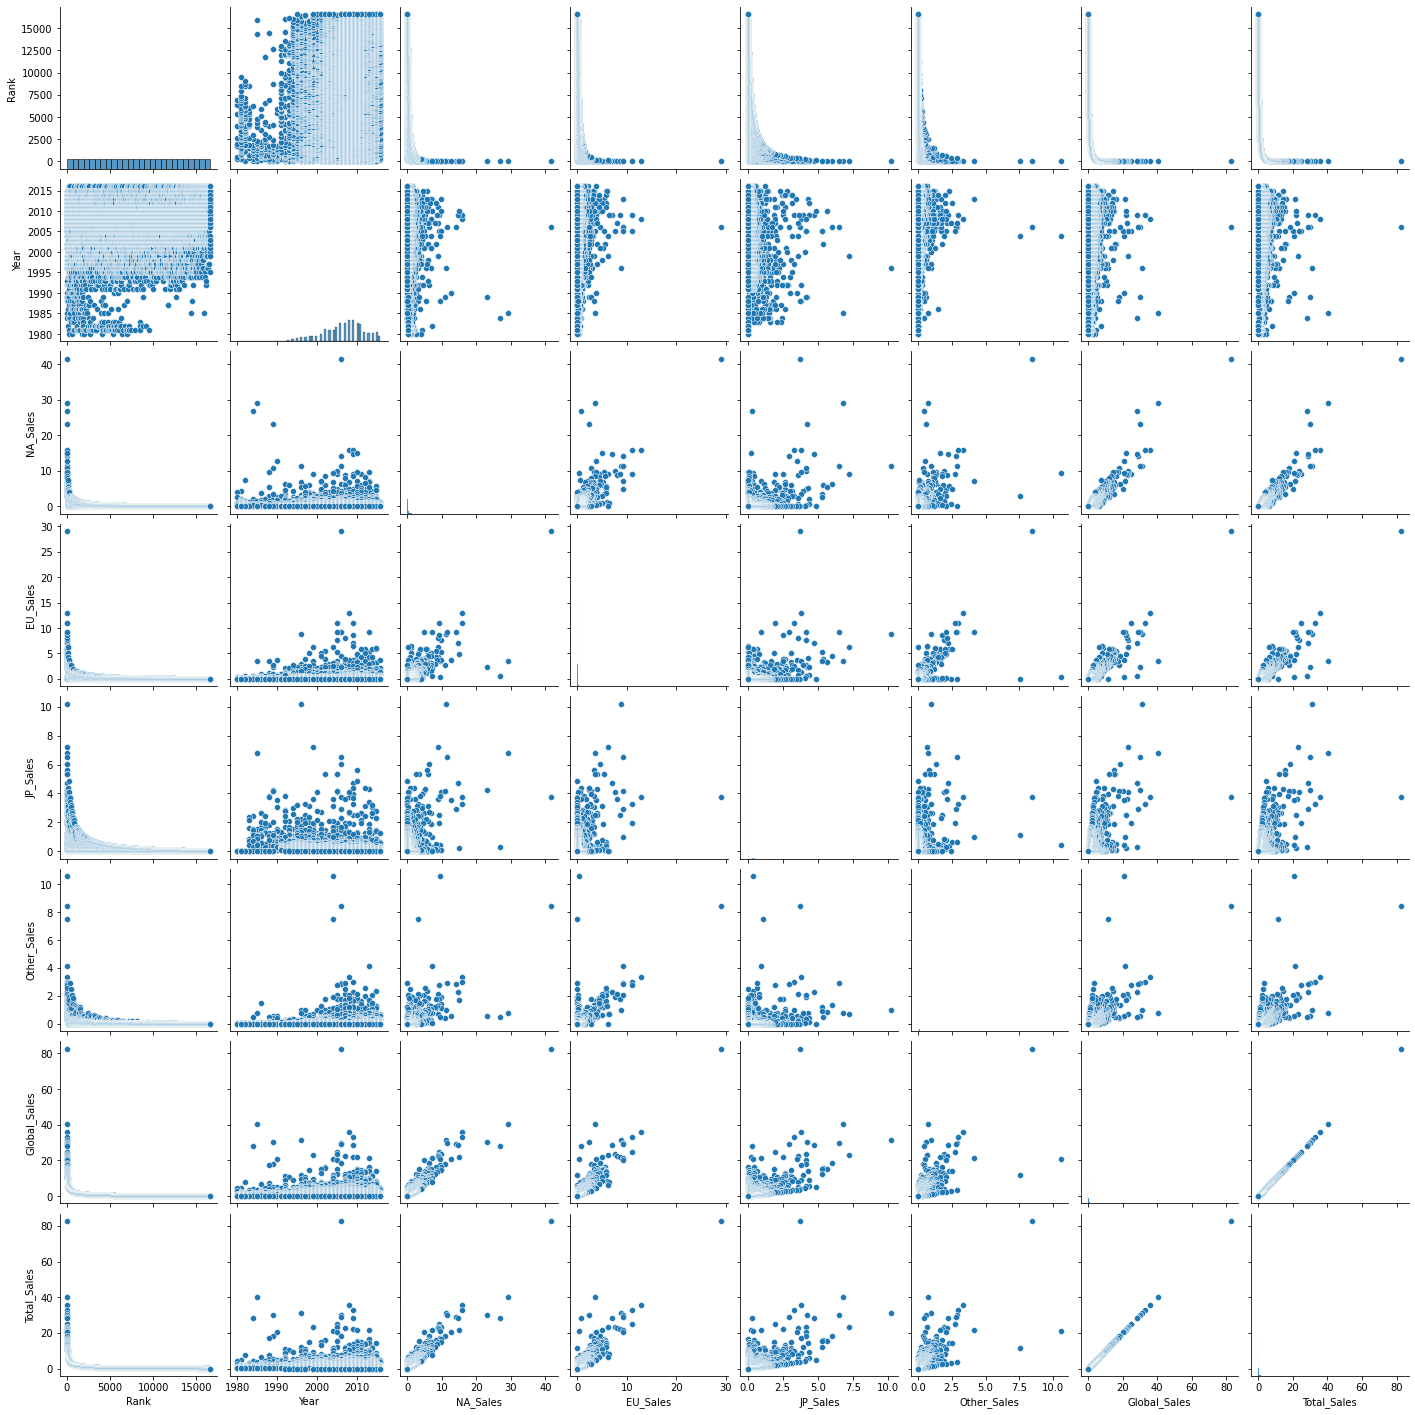

In [32]:
# pairplot
sns.pairplot(df)
plt.show()
